In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import fastf1
import fastf1.plotting

# Enable the cache
fastf1.Cache.enable_cache('cache')

In [5]:
# load a session and its telemetry data
session = fastf1.get_session(2024, 'Jeddah', 'Q')
session.load()

# Get circuit corner information
circuit_info = session.get_circuit_info()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '14', '81', '4', '63', '44', '22', '18', '38', '23', '20', '3', '27', '77', '31', '10', '2', '24']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        W

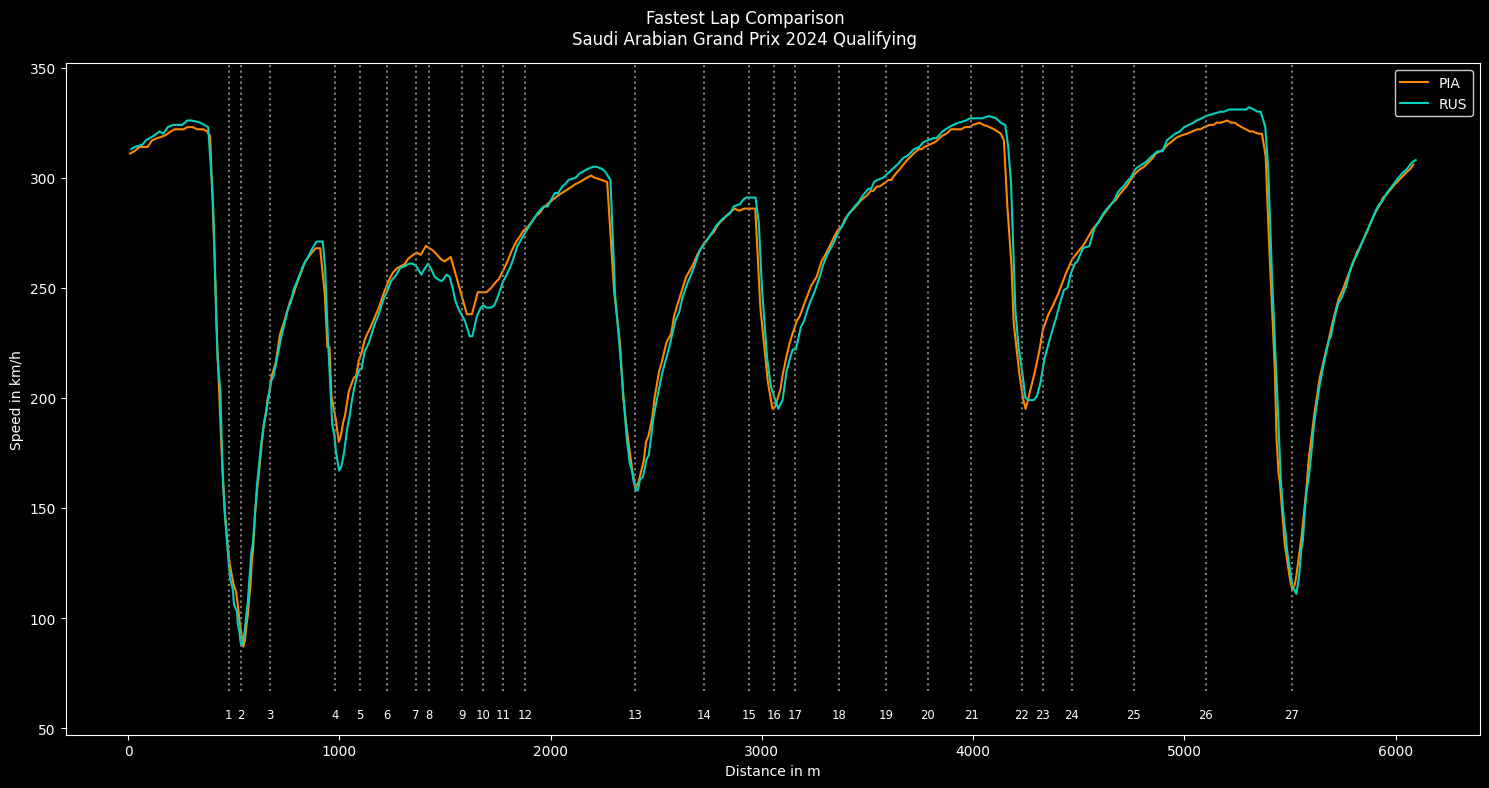

In [7]:
# Getting fastest laps for both drivers
nor_lap = session.laps.pick_driver('PIA').pick_fastest()
ham_lap = session.laps.pick_driver('RUS').pick_fastest()

# Adding distance to telemetry data
nor_tel = nor_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

# Get team colors
mcl_color = fastf1.plotting.team_color('MCL')
mer_color = fastf1.plotting.team_color('MER')

# Begin plotting
fig, ax = plt.subplots(figsize=(15, 8), facecolor='black')

# Plot speed telemetry for both drivers
ax.plot(nor_tel['Distance'], nor_tel['Speed'], color=mcl_color, label='PIA')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='RUS')

# Annotate corners on the plot
v_min = min(nor_tel['Speed'].min(), ham_tel['Speed'].min())
v_max = max(nor_tel['Speed'].max(), ham_tel['Speed'].max())

ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min - 20, ymax=v_max + 20,
          linestyles='dotted', colors='grey')
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min - 30, txt, 
            va='center_baseline', ha='center', size='small', color='white')

# Set axis labels and title
ax.set_xlabel('Distance in m', color='white')
ax.set_ylabel('Speed in km/h', color='white')
plt.suptitle(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Qualifying", color='white')

# Set legend with a black background color and white text
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Set background color to black and text to white for visibility
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
ax.tick_params(colors='white', which='both')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.title.set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Adjust the y-axis limits to include the corner numbers
ax.set_ylim([v_min - 40, v_max + 20])

# Show plot with a tight layout
plt.tight_layout()
plt.show()

In [8]:
# load a session and its telemetry data
session = fastf1.get_session(2024, 'Jeddah', 'R')
session.load()

# Get circuit corner information
circuit_info = session.get_circuit_info()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '22', '2', '3', '77', '24', '18', '10']
core        WARNING 	Failed to preserve data type for co

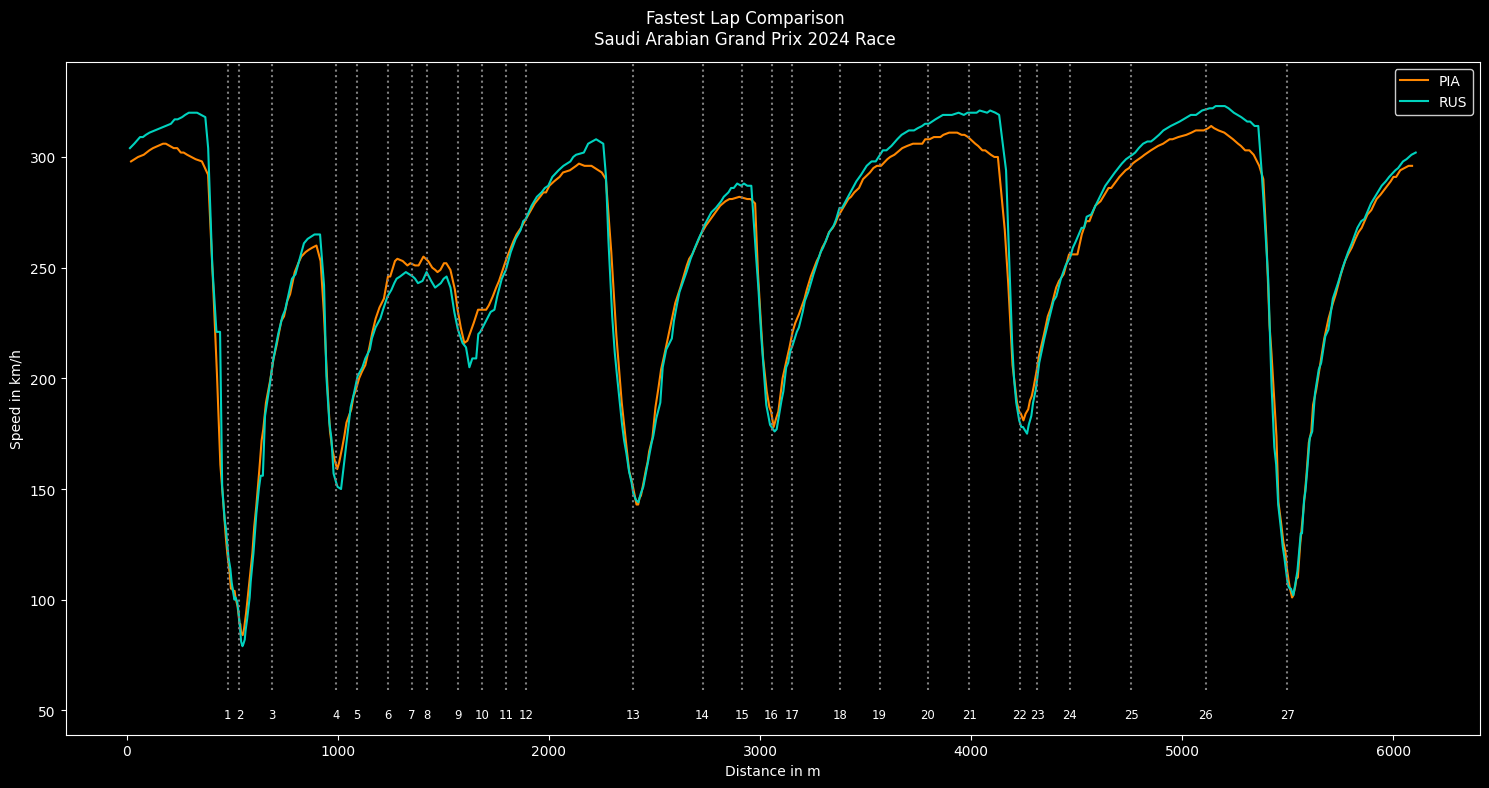

In [10]:
# Getting fastest laps for both drivers
nor_lap = session.laps.pick_driver('PIA').pick_fastest()
ham_lap = session.laps.pick_driver('RUS').pick_fastest()

# Adding distance to telemetry data
nor_tel = nor_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

# Get team colors
mcl_color = fastf1.plotting.team_color('MCL')
mer_color = fastf1.plotting.team_color('MER')

# Begin plotting
fig, ax = plt.subplots(figsize=(15, 8), facecolor='black')

# Plot speed telemetry for both drivers
ax.plot(nor_tel['Distance'], nor_tel['Speed'], color=mcl_color, label='PIA')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='RUS')

# Annotate corners on the plot
v_min = min(nor_tel['Speed'].min(), ham_tel['Speed'].min())
v_max = max(nor_tel['Speed'].max(), ham_tel['Speed'].max())

ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min - 20, ymax=v_max + 20,
          linestyles='dotted', colors='grey')
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min - 30, txt, 
            va='center_baseline', ha='center', size='small', color='white')

# Set axis labels and title
ax.set_xlabel('Distance in m', color='white')
ax.set_ylabel('Speed in km/h', color='white')
plt.suptitle(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Race", color='white')

# Set legend with a black background color and white text
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Set background color to black and text to white for visibility
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
ax.tick_params(colors='white', which='both')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.title.set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Adjust the y-axis limits to include the corner numbers
ax.set_ylim([v_min - 40, v_max + 20])

# Show plot with a tight layout
plt.tight_layout()
plt.show()

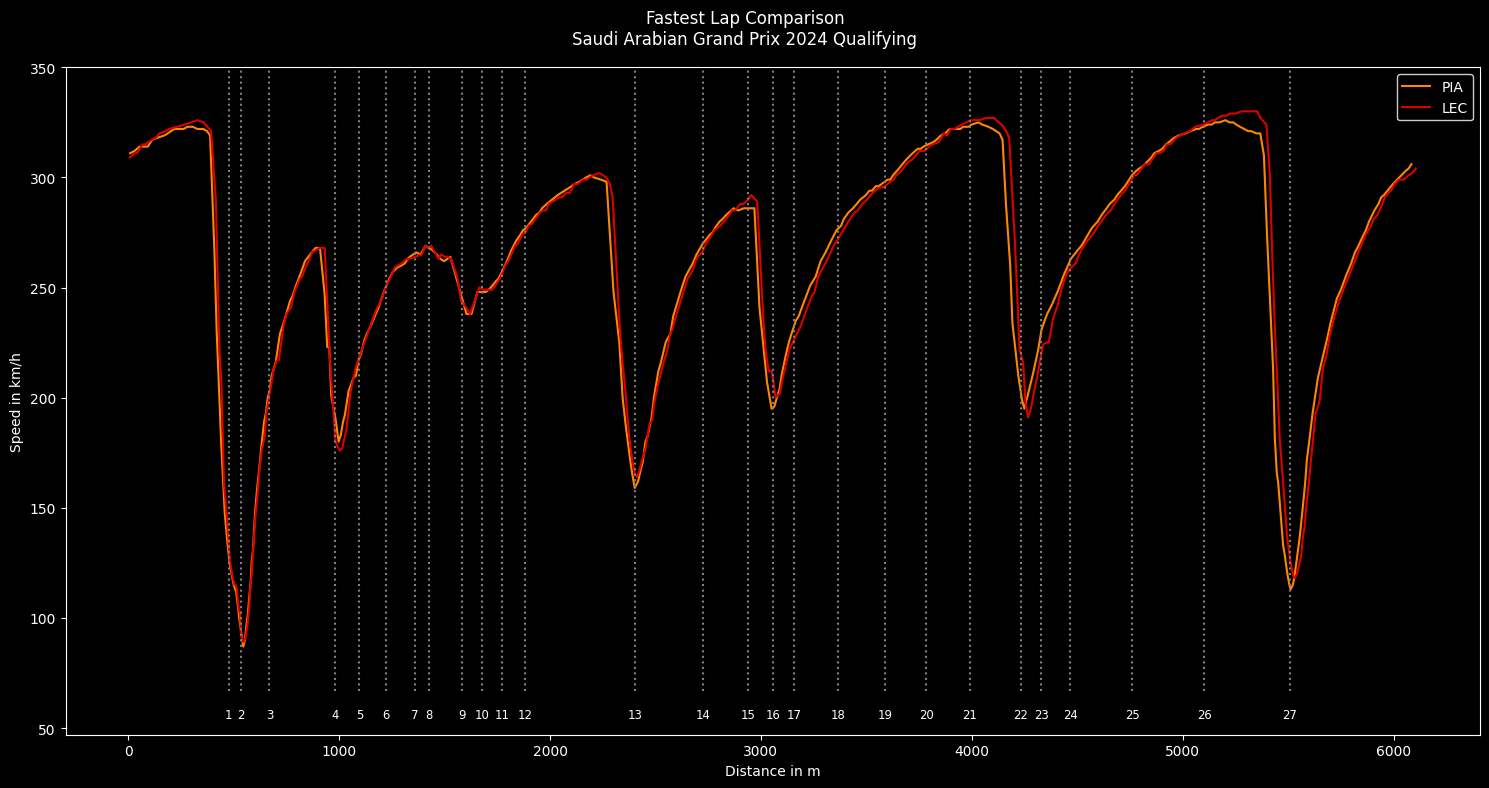

In [6]:
# Getting fastest laps for both drivers
nor_lap = session.laps.pick_driver('PIA').pick_fastest()
ham_lap = session.laps.pick_driver('LEC').pick_fastest()

# Adding distance to telemetry data
nor_tel = nor_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

# Get team colors
mcl_color = fastf1.plotting.team_color('MCL')
mer_color = fastf1.plotting.team_color('FER')

# Begin plotting
fig, ax = plt.subplots(figsize=(15, 8), facecolor='black')

# Plot speed telemetry for both drivers
ax.plot(nor_tel['Distance'], nor_tel['Speed'], color=mcl_color, label='PIA')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='LEC')

# Annotate corners on the plot
v_min = min(nor_tel['Speed'].min(), ham_tel['Speed'].min())
v_max = max(nor_tel['Speed'].max(), ham_tel['Speed'].max())

ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min - 20, ymax=v_max + 20,
          linestyles='dotted', colors='grey')
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min - 30, txt, 
            va='center_baseline', ha='center', size='small', color='white')

# Set axis labels and title
ax.set_xlabel('Distance in m', color='white')
ax.set_ylabel('Speed in km/h', color='white')
plt.suptitle(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Qualifying", color='white')

# Set legend with a black background color and white text
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

# Set background color to black and text to white for visibility
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
ax.tick_params(colors='white', which='both')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.title.set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Adjust the y-axis limits to include the corner numbers
ax.set_ylim([v_min - 40, v_max + 20])

# Show plot with a tight layout
plt.tight_layout()
plt.show()